# 인공 신경망

- 유방암 결과를 분류하는 신경망 모델을 만들고 predict method를 이용하여 목표변수 범주를 예측하라. 그리고 모델의 정확도와 confusion matrix를 구하라.  
  - 신경망 모델을 사용했을 때 모델의 정확도가 향상이 되었는지 확인 후 추후 어떤 모델을 생성하는 것이 분류를 잘하는지(성능이 좋을지) 결정하기 위한 수련의 목적이라고 파악

#### 공통 패키지 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# train, test를 분할하기 위한 함수
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# 한글 폰트(맑은 고딕) 적용
matplotlib.rc("font", family = "Malgun Gothic")

## 데이터 구성하기

- 데이터를 파악하고 이해하기 위해 데이터 수집과 탐색 수행

#### 데이터 불러오기

In [3]:
df_raw = pd.read_csv("C:/Users/Myung-jin/21aibigdata/bigdata/유방암.CSV" , encoding = "euc-kr")
df_raw

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.33310,0.33270,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.12570,0.10470,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.35380,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.27910,0.31510,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,음성,19.55,23.21,128.90,1174.0,0.10100,0.13180,0.18560,0.10210,0.1989,...,20.82,30.44,142.00,1313.0,0.12510,0.24140,0.38290,0.18250,0.2576,0.07602
316,음성,19.10,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,0.1634,...,20.33,32.72,141.30,1298.0,0.13920,0.28170,0.24320,0.18410,0.2311,0.09203
317,음성,24.25,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,0.2655,...,26.02,23.99,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009
318,음성,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,...,20.96,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

> 신경망을 이용하여 범주형 목표변수인 diagnosis의 분류를 맞추는 모델을 생성하기 위하여 MLPClassifier를 적용해보려고 한다.

#### 결측치 확인

In [5]:
df_raw.isnull().sum(axis = 0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

> 결측치가 없으니 대체할 필요가 없다. 하지만 분류 모델 생성을 위해 범주형인 목표변수 diagonosis의 데이터 전처리가 필요하다.

#### 데이터 전처리 - 목표변수 변환 및 설명/목표변수 분리

In [6]:
df_raw["diagnosis"] = np.where(df_raw["diagnosis"] == "양성", 'p', 'n')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,n,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,p,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,n,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,p,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,p,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [7]:
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_raw_y = df_raw["diagnosis"]
df_raw_x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [8]:
df_raw_y.head()

0    n
1    p
2    n
3    p
4    p
Name: diagnosis, dtype: object

#### train, test 데이터 분할

In [9]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.4, # test 데이터의 비율
                                                                random_state = 1234)  # random state

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (192, 30)
train data Y size : (192,)
test data X size : (128, 30)
test data Y size : (128,)


## MLPClassifier 모델 생성

- 위에서 유방암 데이터에 대해 확인해본 결과 각 설명변수마다 단위가 다른 것을 확인할 수 있다. 가령 둘레의 평균과 영역의 넓이는 단위가 다르다. 또한 활성함수도 데이터의 스케일링 영향을 많이 받는다. 그래서 스케일링 후 파라미터 변경을 통해 최적의 모델을 생성하여야 하지만 default일 때와 비교해보고 싶어 default 파라미터 모델링부터 진행하였다. 

#### default parameter로 모델 생성

In [10]:
nn_uncustomized = MLPClassifier(random_state = 1234)
nn_uncustomized.fit(df_train_x, df_train_y)

# 훈련 데이터 정확도
print("Accucary on training set: {:.3f}".format(nn_uncustomized.score(df_train_x, df_train_y)))

# test 데이터 정확도
print("Accucary on test set: {:.3f}".format(nn_uncustomized.score(df_test_x, df_test_y)))

Accucary on training set: 0.599
Accucary on test set: 0.758


In [11]:
nn_uncustomized

MLPClassifier(random_state=1234)

> 기본 파라미터로 MLPClassifier 모델을 생성하였더니 훈련 데이터에 대한 정확도가 약 60%, 테스트 데이터에 대한 정확도가 75.8%가 나왔다. 두 데이터셋에 대한 정확도 차가 크기 때문에 **모델의 성능이 좋지 않고**, 또한 **훈련 데이터가 과소적합되었다**는 것을 확인할 수 있다. 그렇다고 테스트 데이터에 대한 정확도도 좋은 편이 아니다. 스케일링한 후 정확도와 한 번 비교해보자.

#### scale 변환

In [12]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [13]:
# 스케일링 후 데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, # 설명변수 데이터
                                                                test_size = 0.4, # test 데이터의 비율
                                                                random_state = 1234)  # random state

print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))

train data X size : (192, 30)
test data X size : (128, 30)


#### scale 조절 후 모델 생성

In [14]:
nn_scaled = MLPClassifier(random_state = 1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)

# 훈련 데이터 정확도
print("Accucary on training set: {:.3f}".format(nn_scaled.score(df_scaled_train_x, df_train_y)))

# test 데이터 정확도
print("Accucary on test set: {:.3f}".format(nn_scaled.score(df_scaled_test_x, df_test_y)))

Accucary on training set: 0.995
Accucary on test set: 0.953


C:\Users\Myung-jin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


> 스케일링 전 기본 파라미터로 생성한 모델의 정확도와 비교를 해보니,  
  
> Accucary on training set: 0.599 -> 0.995  
  Accucary on test set: 0.758 -> 0.953  
  
> 기존에 예측했던 대로 데이터셋에 대한 정확도가 크게 향상되었다. 이전 모델은 훈련 데이터에 대해 과소적합이 일어난 것에 반해, **스케일링 후 모델은 과대적합의 경향이 있고 정확도와 성능이 매우 향상됨**을 알 수 있다. 파라미터 변경을 통해 과적합을 방지하면서 분류 예측 성능이 좋아질 수 있는지 파라미터를 변경해 새로운 모델을 생성해보자. 

#### parameter 변경 : Hidden layer (은닉층 개수와 층별 노드 개수 지정)

1) 은닉층 개수가 1개일 때

In [15]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_hidden = [10*hidden for hidden in range(1, 21)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = v_hidden,random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy
df_accuracy_hidden.round(3)

C:\Users\Myung-jin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Myung-jin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Myung-jin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Myung-jin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Myung-jin\anaconda3\lib\site-packages\sklearn\n

,HiddenLayer,TrainAccuracy,TestAccuracy
0,10,0.969,0.867
1,20,0.995,0.938
2,30,0.995,0.945
3,40,0.995,0.945
4,50,0.995,0.945
5,60,0.995,0.945
6,70,0.995,0.945
7,80,0.995,0.938
8,90,0.995,0.953
9,100,0.995,0.953


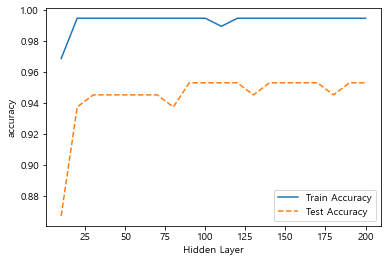

In [16]:
# 정확도를 그래프로 표현
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Hidden Layer")
plt.legend()

2) 은닉층 개수가 2개일 때

In [17]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_hidden = [10*hidden for hidden in range(1, 21)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden),random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy
df_accuracy_hidden.round(3)

C:\Users\Myung-jin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Myung-jin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Myung-jin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Myung-jin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Myung-jin\anaconda3\lib\site-packages\sklearn\n

,HiddenLayer,TrainAccuracy,TestAccuracy
0,10,0.984,0.938
1,20,0.984,0.945
2,30,1.000,0.953
3,40,1.000,0.938
4,50,1.000,0.945
5,60,1.000,0.953
6,70,1.000,0.945
7,80,1.000,0.945
8,90,1.000,0.945
9,100,1.000,0.945


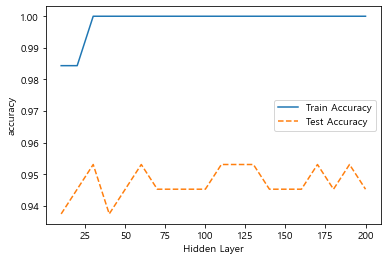

In [18]:
# 정확도를 그래프로 표현
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Hidden Layer")
plt.legend()

> 은닉층의 구조가 복잡할수록 정확도는 향상되지만 그만큼 모델의 과대적합 경향성이 나타난다. MLPClassifier의 기본 파라미터(**은닉 층 1개, 층별 노드 100개**)일 때 훈련 데이터의 정확도가 99.5%, 테스트 데이터의 정확도가 95.3%였다. 성능을 향상시키기 위해 은닉 층 개수를 늘려보고 층별 노드 구간도 넓게 잡아봤는데 모든 구간에 대해 테스트 데이터의 정확도는 최대 95.3%를 넘지 않았다. 훈련 데이터에 대해 대체로 과적합의 경향이 보였지만, 훈련 데이터에 대한 정확도를 향상시키는 것이 좋은 것인지 아니면 결국 두 데이터셋의 정확도 차를 커지게 하기 때문에 성능의 저하가 일어나는 것인지 판별이 되지 않았다. 고민 끝에 최종적으로 훈련 데이터에 대해 정확도를 향상한 지점인 **은닉 층 2개, 층별 노드 30개를 지정**하였다. 

#### parameter 변경 : Activation (활성화 함수 변경)

In [19]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (30, 30),random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy
df_accuracy_function.round(3)

C:\Users\Myung-jin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Myung-jin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Myung-jin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.990,0.945
1,tanh,0.995,0.953
2,relu,1.000,0.953


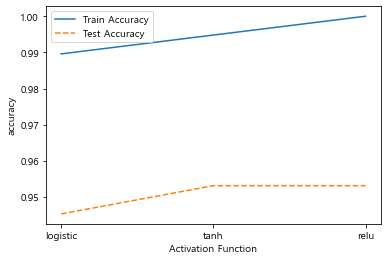

In [20]:
# 정확도를 그래프로 표현
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Activation Function")
plt.legend()

> 다중 클래스의 분류에 적용되는 softmax를 제외하고 세 개의 활성화 함수를 이용한 모델링을 통해 정확도를 비교해보았다. 셋 중 relu가 가장 높은 정확도를 가지는 것을 확인할 수 있다. 따라서 **활성화 함수를 relu로 지정**하였다.

#### parameter 변경 : Solver (가중치 최적화 변경)

In [21]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_solver = ["lbfgs", "sgd", "adam"]

for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver, activation = "relu", hidden_layer_sizes = (30, 30),random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy
df_accuracy_solver.round(3)

C:\Users\Myung-jin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Myung-jin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.953
1,sgd,0.984,0.906
2,adam,1.000,0.953


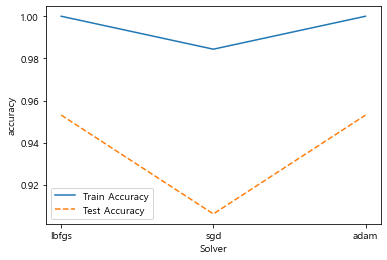

In [22]:
# 정확도를 그래프로 표현
plt.plot(para_solver, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_solver, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Solver")
plt.legend()

> 최적화 모델에 대해 정확도를 비교하였더니 lbfgs와 adam이 높은 정확도와 좋은 성능을 보였다. 둘 다 같은 정확도를 보였기에 어떤 가중치 최적화 모델을 선택할까 고민 끝에, 성능이 대체적으로 우수하다고 알려진 **"adam" 모델을 선택**하였다.

#### parameter 변경 : Mini Batch

In [23]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_batch = [20 * batch for batch in range(1,10)]

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = "adam", activation = "relu", hidden_layer_sizes = (30, 30),random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy
df_accuracy_batch.round(3)

C:\Users\Myung-jin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Myung-jin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Mini Batch,TrainAccuracy,TestAccuracy
0,20,1.000,0.953
1,40,1.000,0.953
2,60,1.000,0.953
3,80,1.000,0.953
4,100,1.000,0.953
5,120,1.000,0.953
6,140,1.000,0.953
7,160,1.000,0.953
8,180,0.995,0.945


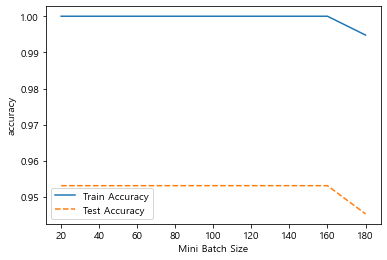

In [24]:
# 정확도를 그래프로 표현
plt.plot(para_batch, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Mini Batch Size")
plt.legend()

> 미니 배치 사이즈가 커질 때 훈련 데이터와 테스트 데이터에 대해 정확도의 변동이 없었다가 160을 기점으로 변동이 있는 것을 확인할 수 있다. 기존 디폴트 값이 설명변수 갯수인 30개였던 것 같은데 30 전후 변동이 없고, 대체적인 이론으로는 미니 배치 사이즈가 커질수록 훈련 데이터는 과적합, 테스트 데이터는 오차 증가 경향성이 증가한다고 배웠기 때문에 배치 사이즈를 디폴트보다 작은(정확도는 디폴트일 때랑 똑같지만) **20을 지정**하였다. 

## 최종 모델 생성

In [25]:
nn_final = MLPClassifier(batch_size = 20, solver = "adam", activation = "relu", hidden_layer_sizes = (30, 30),random_state = 1234)
nn_final.fit(df_scaled_train_x, df_train_y)

y_pred = nn_final.predict(df_scaled_test_x)

print(y_pred)
print()
print("Accuracy on training set: {:.3f}".format(nn_final.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}\n".format(nn_final.score(df_scaled_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits =3))

['n' 'n' 'p' 'n' 'n' 'n' 'n' 'n' 'p' 'n' 'n' 'n' 'n' 'p' 'p' 'n' 'p' 'p'
 'p' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'p' 'n' 'n' 'n' 'p' 'p' 'n' 'p' 'n' 'n'
 'n' 'n' 'p' 'n' 'n' 'p' 'p' 'n' 'n' 'p' 'n' 'p' 'n' 'p' 'n' 'n' 'n' 'p'
 'n' 'n' 'n' 'n' 'p' 'n' 'p' 'n' 'n' 'n' 'n' 'p' 'p' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'p' 'p' 'n' 'n' 'n' 'p' 'n' 'p' 'n'
 'p' 'p' 'n' 'n' 'p' 'n' 'p' 'n' 'n' 'n' 'n' 'p' 'n' 'n' 'n' 'p' 'n' 'p'
 'n' 'p' 'n' 'p' 'n' 'n' 'n' 'p' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'p']

Accuracy on training set: 1.000
Accuracy on test set: 0.953

Confusion matrix: 
[[91  6]
 [ 0 31]]
              precision    recall  f1-score   support

           n      1.000     0.938     0.968        97
           p      0.838     1.000     0.912        31

    accuracy                          0.953       128
   macro avg      0.919     0.969     0.940       128
weighted avg      0.961     0.953     0.954       128



> 유방암 결과를 분류하는 MLPClassifier 모델을 생성하였다. 이 모델을 predict 메소드를 통해 범주를 확인해본 결과 분류가 n, p 두 가지로 나오는 것을 알 수 있다. 실제 목표변수인 diagnosis(유방암의 진단결과) 양성(p), 음성(n) 두 가지 측도로 이산형 범주가 잘 추출됨을 확인했다.

> 또한 음성(n)의 갯수가 확연히 많은데 이는 데이터의 목표변수인 진단결과가 양성(108개)보다 음성(212개)의 표본이 2배 정도로 많았기 때문에 음성(n)에 대한 정밀도는 높지만 양성(1)에 대한 정밀도가 떨어짐을 알 수 있다.
  
> 스케일링 + 기본 파라미터 모델과 비교했을 때 훈련 데이터의 정확도가 향상되었음을 알 수 있다. 하지만 1이라는 수치는 결국 과적합의 경향을 보인다는 것이기에 이 모델이 스케일링 + 기본 파라미터 모델과 비교했을 때 좋은 성능의 모델인지 판별을 할 수가 없었다.
  
> confusion matrix을 확인하면 음성인데 예측을 제대로 할 확률은 91/97로 거의 제대로 예측을 한다는 것임을 알 수 있다. 또한 양성인데 예측을 제대로 할 확률도 31/31 * 100 = 100%이므로 이 모델은 예측을 잘 하는 모델임을 알 수 있다. 하지만 정밀도를 보면 진단결과가 양성일 때의 데이터 표본이 확실히 적기에 정밀도가 떨어짐을 확인하였기 때문에 추후 **데이터 갯수를 늘려 학습시키고 성능을 평가할 필요**가 있다. 
  
> 이전에 같은 유방암 데이터셋을 가지고 다른 분류 예측 모델을 생성할 때 현 산업에 쓰일 만큼 성능이 괜찮다고 했는데, 과적합 문제를 해결하기 위해서라도 표본의 갯수를 늘려야함을 많이 느꼈고, 현 의료기기에 유방암 예측 모델로 쓰일 만큼 좋은 모델이 아니라는 판단이 든다. 